In [1]:
# import the required packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


## 1. HR Analytics

### 1.1 Load and Explore the data

In [2]:
df_hr = pd.read_csv('hr_data.csv')
print(df_hr.info())
print(df_hr.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None
        

In [3]:
df_hr_cat = df_hr.select_dtypes(['object']).copy()
print(df_hr_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           54808 non-null  object
 1   region               54808 non-null  object
 2   education            52399 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB
None


In [4]:
df_hr_cat.describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


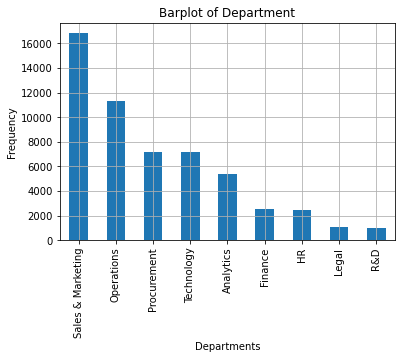

In [5]:
df_hr_cat.department.value_counts().plot.bar()
plt.xlabel('Departments')
plt.ylabel('Frequency') 
plt.title('Barplot of Department')
plt.grid(True)
plt.show()

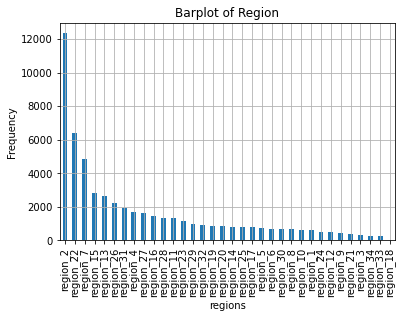

In [6]:
df_hr_cat.region.value_counts().plot.bar()
plt.xlabel('regions')
plt.ylabel('Frequency') 
plt.title('Barplot of Region')
plt.grid(True)
plt.show()

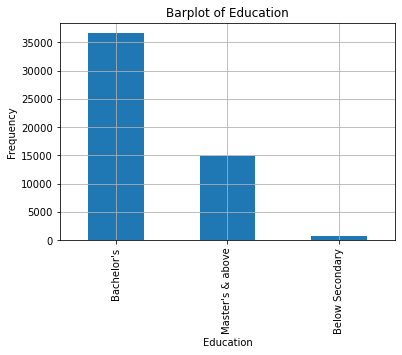

In [7]:
df_hr_cat.education.value_counts().plot.bar()
plt.xlabel('Education')
plt.ylabel('Frequency') 
plt.title('Barplot of Education')
plt.grid(True)
plt.show()

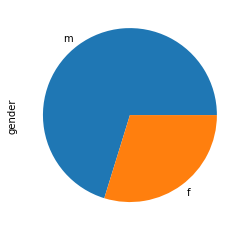

In [8]:
df_hr_cat.gender.value_counts().plot.pie()
plt.show()

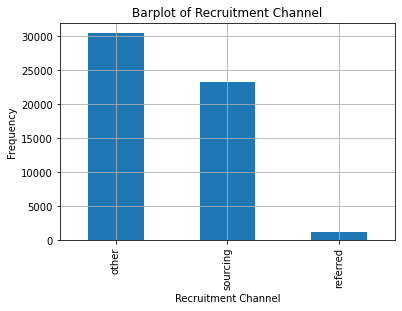

In [9]:
df_hr_cat.recruitment_channel.value_counts().plot.bar()
plt.xlabel('Recruitment Channel')
plt.ylabel('Frequency') 
plt.title('Barplot of Recruitment Channel')
plt.grid(True)
plt.show()

In [10]:
for i in df_hr_cat:
    print(df_hr_cat[i].name.upper())
    print(df_hr_cat[i].value_counts())
    print()

DEPARTMENT
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

REGION
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

EDUCATION
Bachelor's          366

In [11]:
df_hr_num = df_hr.select_dtypes(['int64', 'float64']).copy()
print(df_hr_num.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   no_of_trainings       54808 non-null  int64  
 2   age                   54808 non-null  int64  
 3   previous_year_rating  50684 non-null  float64
 4   length_of_service     54808 non-null  int64  
 5   KPIs_met >80%         54808 non-null  int64  
 6   awards_won?           54808 non-null  int64  
 7   avg_training_score    54808 non-null  int64  
 8   is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 3.8 MB
None


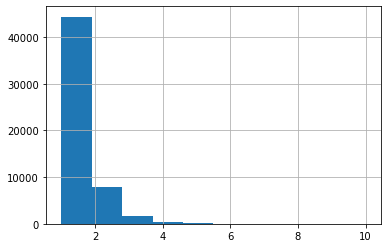

In [12]:
df_hr_num['no_of_trainings'].hist()

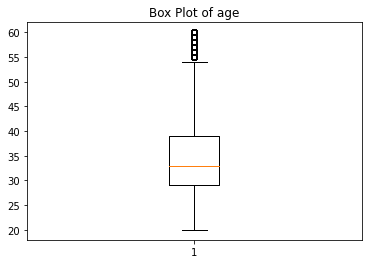

In [13]:
plt.boxplot(df_hr_num['age'])
plt.title('Box Plot of age')
plt.show()

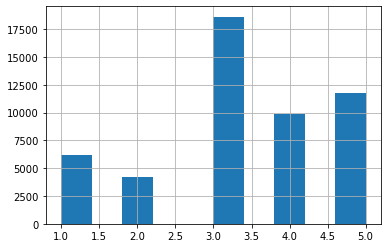

In [14]:
df_hr_num['previous_year_rating'].hist()

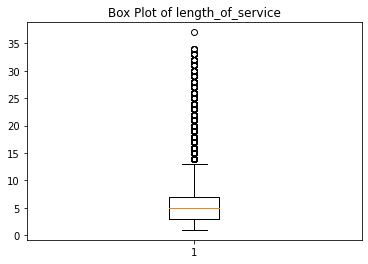

In [15]:
plt.boxplot(df_hr_num['length_of_service'])
plt.title('Box Plot of length_of_service')
plt.show()

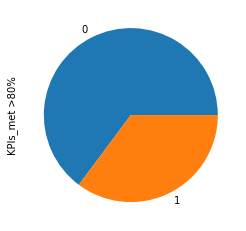

In [16]:
df_hr_num['KPIs_met >80%'].value_counts().plot.pie()
plt.show()

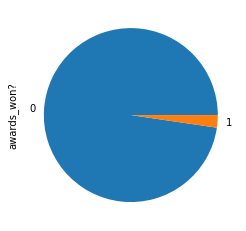

In [17]:
df_hr_num['awards_won?'].value_counts().plot.pie()
plt.show()

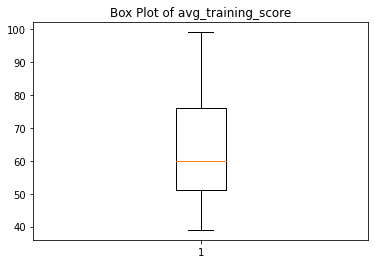

In [18]:
plt.boxplot(df_hr_num['avg_training_score'])
plt.title('Box Plot of avg_training_score')
plt.show()

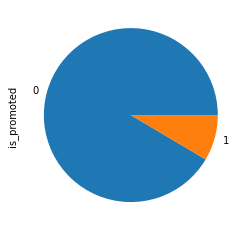

In [19]:
df_hr_num['is_promoted'].value_counts().plot.pie()
plt.show()

### 1.2 Cleanse and Transform the data

In [20]:
print("Number of Null cells in categorical data")
print(df_hr_cat.isnull().sum())
print()
print("Number of Null cells in numeric data")
print(df_hr_num.isnull().sum())

Number of Null cells in categorical data
department                0
region                    0
education              2409
gender                    0
recruitment_channel       0
dtype: int64

Number of Null cells in numeric data
employee_id                0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


In [21]:
df_hr.loc[df_hr["education"].isna(),'education'] = 1
df_hr["education"] = df_hr["education"].replace("Below Secondary", 1)
df_hr["education"] = df_hr["education"].replace("Bachelor's", 2)
df_hr["education"] = df_hr["education"].replace("Master's & above", 3)

In [22]:
df_hr = df_hr.dropna(subset = ["previous_year_rating"])
df_hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [23]:
df_hr['gender'] = df_hr['gender'].map( {'f': 0, 'm': 1} ).astype(int)

In [24]:
departmentPos = df_hr['department'].value_counts(ascending=True)
df_value_counts = pd.DataFrame(departmentPos)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['initialR', 'counts'] # change column names
initialRList = df_value_counts['initialR'].to_list()
orderList = []
count = 1
while count <= len(initialRList):
    orderList.append(count)
    count+=1
    
i = 0
while i < len(df_hr):
    j = 0
    while j < len(initialRList):
        if df_hr.iloc[i, 1] == initialRList[j]:
            df_hr.iloc[i, 1] = orderList[j]
            break
        j+=1
    i+=1

df_hr['department'] = df_hr['department'].astype(int)
    
print(df_hr['department'].value_counts())

9    15529
8    10760
7     6709
6     6592
5     4886
4     2253
3     2172
2      912
1      871
Name: department, dtype: int64


In [25]:
df_hr['region'] = df_hr['region'].str.split('_').str[1]
df_hr['region'] = df_hr['region'].astype(int)

In [26]:
df_hr['recruitment_channel'] = df_hr['recruitment_channel'].map( {'other': 1, 'sourcing': 2, 'referred': 3} ).astype(int)

In [27]:
df_hr.drop('employee_id', axis = 1, inplace = True)

In [28]:
df1=df_hr[df_hr['is_promoted']==1]
df0=df_hr[df_hr['is_promoted']==0]
df0_sampled = df0.sample(n=len(df1), random_state=2).copy()
df_hr=pd.concat([df1,df0_sampled],axis=0)
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8658 entries, 11 to 504
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            8658 non-null   int32  
 1   region                8658 non-null   int32  
 2   education             8658 non-null   int64  
 3   gender                8658 non-null   int32  
 4   recruitment_channel   8658 non-null   int32  
 5   no_of_trainings       8658 non-null   int64  
 6   age                   8658 non-null   int64  
 7   previous_year_rating  8658 non-null   float64
 8   length_of_service     8658 non-null   int64  
 9   KPIs_met >80%         8658 non-null   int64  
 10  awards_won?           8658 non-null   int64  
 11  avg_training_score    8658 non-null   int64  
 12  is_promoted           8658 non-null   int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 811.7 KB


### 1.3 Correlation Analysis

In [29]:
df_hr.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,-0.064080,0.000678,-0.010626,-0.028631,-0.023849,0.129121,-0.062246,0.108277,-0.031644,-0.004299,-0.443619,-0.001189
region,-0.064080,1.000000,-0.071864,0.110970,-0.022324,0.018198,-0.267064,-0.014872,-0.167057,0.008292,0.004356,0.047733,-0.032429
education,0.000678,-0.071864,1.000000,-0.042626,-0.015447,-0.014661,0.367696,0.020830,0.238530,0.011428,0.008170,0.052094,0.056828
gender,-0.010626,0.110970,-0.042626,1.000000,0.016877,0.058737,-0.021128,-0.019019,-0.026041,-0.016840,0.008145,-0.028560,-0.022785
recruitment_channel,-0.028631,-0.022324,-0.015447,0.016877,1.000000,-0.013594,-0.047140,0.019143,-0.023846,0.025491,-0.005679,0.022628,0.018509
no_of_trainings,-0.023849,0.018198,-0.014661,0.058737,-0.013594,1.000000,-0.064647,-0.056200,-0.026961,-0.042390,-0.022645,0.048194,-0.047969
age,0.129121,-0.267064,0.367696,-0.021128,-0.047140,-0.064647,1.000000,-0.005662,0.620452,-0.050616,-0.013337,-0.057515,-0.033802
previous_year_rating,-0.062246,-0.014872,0.020830,-0.019019,0.019143,-0.056200,-0.005662,1.000000,-0.017711,0.289384,0.058980,0.122510,0.302577
length_of_service,0.108277,-0.167057,0.238530,-0.026041,-0.023846,-0.026961,0.620452,-0.017711,1.000000,-0.071732,-0.070255,-0.050756,-0.022705
KPIs_met >80%,-0.031644,0.008292,0.011428,-0.016840,0.025491,-0.042390,-0.050616,0.289384,-0.071732,1.000000,0.042615,0.021647,0.378445


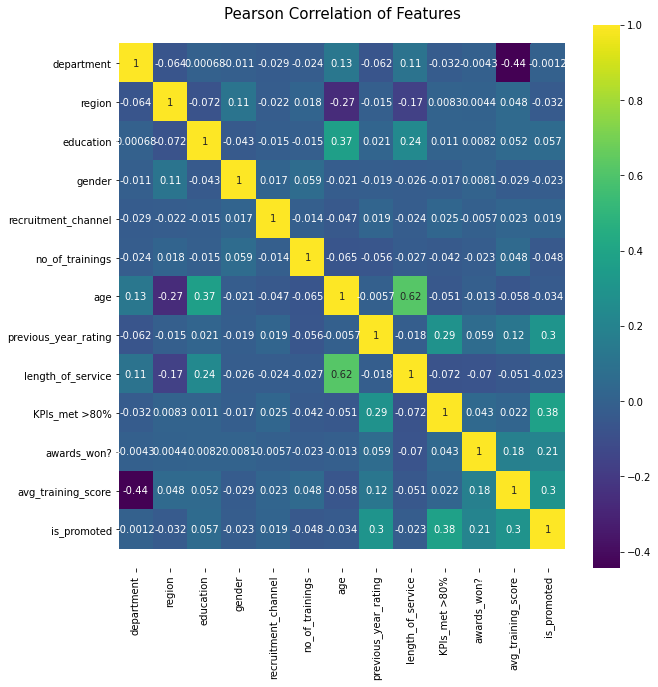

In [30]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_hr.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [31]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8658 entries, 11 to 504
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            8658 non-null   int32  
 1   region                8658 non-null   int32  
 2   education             8658 non-null   int64  
 3   gender                8658 non-null   int32  
 4   recruitment_channel   8658 non-null   int32  
 5   no_of_trainings       8658 non-null   int64  
 6   age                   8658 non-null   int64  
 7   previous_year_rating  8658 non-null   float64
 8   length_of_service     8658 non-null   int64  
 9   KPIs_met >80%         8658 non-null   int64  
 10  awards_won?           8658 non-null   int64  
 11  avg_training_score    8658 non-null   int64  
 12  is_promoted           8658 non-null   int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 811.7 KB


In [32]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8658 entries, 11 to 504
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            8658 non-null   int32  
 1   region                8658 non-null   int32  
 2   education             8658 non-null   int64  
 3   gender                8658 non-null   int32  
 4   recruitment_channel   8658 non-null   int32  
 5   no_of_trainings       8658 non-null   int64  
 6   age                   8658 non-null   int64  
 7   previous_year_rating  8658 non-null   float64
 8   length_of_service     8658 non-null   int64  
 9   KPIs_met >80%         8658 non-null   int64  
 10  awards_won?           8658 non-null   int64  
 11  avg_training_score    8658 non-null   int64  
 12  is_promoted           8658 non-null   int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 811.7 KB


In [33]:
df_hr.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000,8658.000000
mean,7.002079,14.038577,2.277316,0.692885,1.474243,1.226842,35.187919,3.616886,6.177986,0.509356,0.068145,66.989027,0.500000
std,1.943465,9.916045,0.526437,0.461324,0.549161,0.563460,7.316120,1.220432,4.064751,0.499941,0.252009,14.520506,0.500029
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,6.000000,4.000000,2.000000,0.000000,1.000000,1.000000,30.000000,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000
50%,8.000000,13.000000,2.000000,1.000000,1.000000,1.000000,34.000000,4.000000,5.000000,1.000000,0.000000,64.000000,0.500000
75%,9.000000,22.000000,3.000000,1.000000,2.000000,1.000000,39.000000,5.000000,8.000000,1.000000,0.000000,80.000000,1.000000
max,9.000000,34.000000,3.000000,1.000000,3.000000,7.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000


### 1.4 Export the data

In [34]:
df_hr.to_csv('hr_data_new.csv', index=False)

## 2. Airbnb Singapore

### 2.1 Load and Explore the data

In [35]:
df_air = pd.read_csv('listings.csv')
print(df_air.info())
print(df_air.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [36]:
df_air_cat = df_air.select_dtypes(['object']).copy()
df_air_cat.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


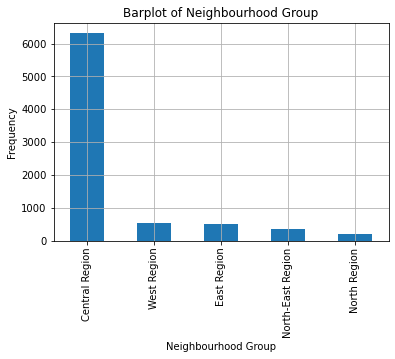

In [37]:
df_air_cat.neighbourhood_group.value_counts().plot.bar()
plt.xlabel('Neighbourhood Group')
plt.ylabel('Frequency') 
plt.title('Barplot of Neighbourhood Group')
plt.grid(True)
plt.show()

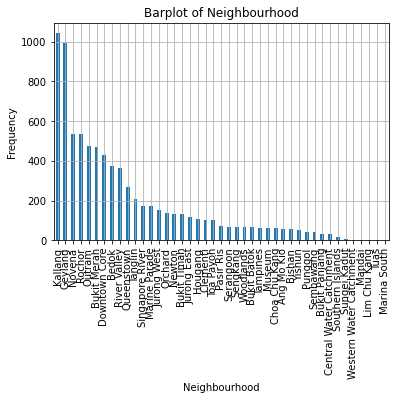

In [38]:
df_air_cat.neighbourhood.value_counts().plot.bar()
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency') 
plt.title('Barplot of Neighbourhood')
plt.grid(True)
plt.show()

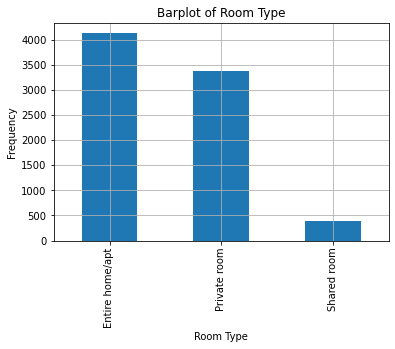

In [39]:
df_air_cat.room_type.value_counts().plot.bar()
plt.xlabel('Room Type')
plt.ylabel('Frequency') 
plt.title('Barplot of Room Type')
plt.grid(True)
plt.show()

In [40]:
df_air_num = df_air.select_dtypes(['int64', 'float64']).copy()
print(df_air_num.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   host_id                         7907 non-null   int64  
 2   latitude                        7907 non-null   float64
 3   longitude                       7907 non-null   float64
 4   price                           7907 non-null   int64  
 5   minimum_nights                  7907 non-null   int64  
 6   number_of_reviews               7907 non-null   int64  
 7   reviews_per_month               5149 non-null   float64
 8   calculated_host_listings_count  7907 non-null   int64  
 9   availability_365                7907 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 617.9 KB
None


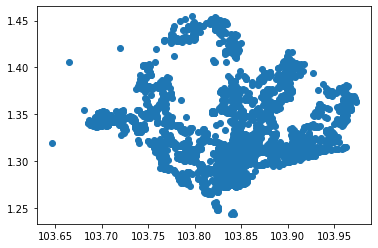

In [41]:
plt.scatter(df_air_num['longitude'],df_air_num['latitude'])
plt.show()

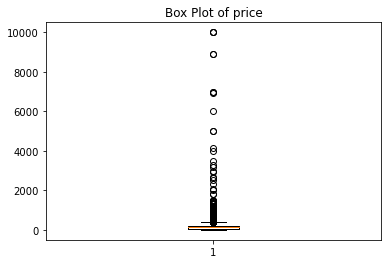

In [42]:
plt.boxplot(df_air_num['price'])
plt.title('Box Plot of price')
plt.show()

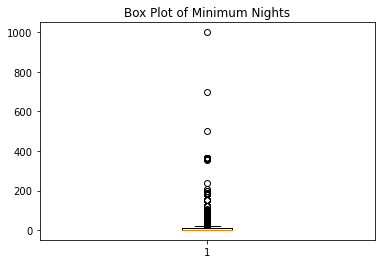

In [43]:
plt.boxplot(df_air_num['minimum_nights'])
plt.title('Box Plot of Minimum Nights')
plt.show()

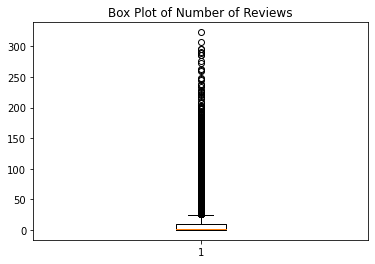

In [44]:
plt.boxplot(df_air_num['number_of_reviews'])
plt.title('Box Plot of Number of Reviews')
plt.show()

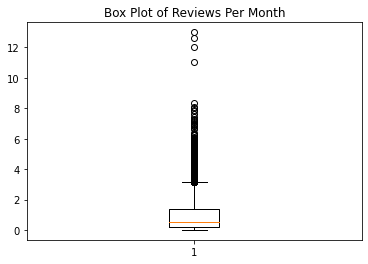

In [45]:
plt.boxplot(df_air_num['reviews_per_month'].dropna())
plt.title('Box Plot of Reviews Per Month')
plt.show()

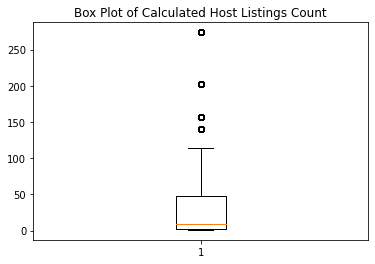

In [46]:
plt.boxplot(df_air_num['calculated_host_listings_count'])
plt.title('Box Plot of Calculated Host Listings Count')
plt.show()

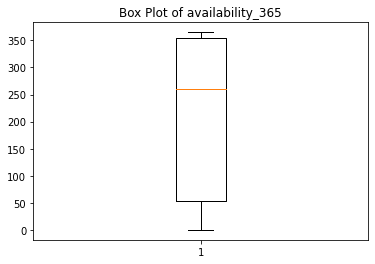

In [47]:
plt.boxplot(df_air_num['availability_365'])
plt.title('Box Plot of availability_365')
plt.show()

In [48]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

### 2.2 Cleanse and Transform the data

In [49]:
print("Number of Null cells in categorical data")
print(df_air_cat.isnull().sum())
print()
print("Number of Null cells in numeric data")
print(df_air_num.isnull().sum())

Number of Null cells in categorical data
name                      2
host_name                 0
neighbourhood_group       0
neighbourhood             0
room_type                 0
last_review            2758
dtype: int64

Number of Null cells in numeric data
id                                   0
host_id                              0
latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [50]:
df_air = df_air.dropna(subset = ["name"])
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7905 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7905 non-null   int64  
 3   host_name                       7905 non-null   object 
 4   neighbourhood_group             7905 non-null   object 
 5   neighbourhood                   7905 non-null   object 
 6   latitude                        7905 non-null   float64
 7   longitude                       7905 non-null   float64
 8   room_type                       7905 non-null   object 
 9   price                           7905 non-null   int64  
 10  minimum_nights                  7905 non-null   int64  
 11  number_of_reviews               7905 non-null   int64  
 12  last_review                     51

In [51]:
df_air.loc[df_air["last_review"].notnull(),'last_review'] =1
df_air.loc[df_air["last_review"].isna(),'last_review'] =0
df_air['last_review'] = df_air['last_review'].astype(int)

In [52]:
df_air.loc[df_air["reviews_per_month"].isna(),'reviews_per_month'] =0


In [53]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7905 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7905 non-null   int64  
 3   host_name                       7905 non-null   object 
 4   neighbourhood_group             7905 non-null   object 
 5   neighbourhood                   7905 non-null   object 
 6   latitude                        7905 non-null   float64
 7   longitude                       7905 non-null   float64
 8   room_type                       7905 non-null   object 
 9   price                           7905 non-null   int64  
 10  minimum_nights                  7905 non-null   int64  
 11  number_of_reviews               7905 non-null   int64  
 12  last_review                     79

In [54]:
Q1 = df_air['price'].describe()['25%']
Q3 = df_air['price'].describe()['75%']
IQR = Q3 - Q1
minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)
print("The outlier range is expected to be lesser than {0} or greater than {1}".format(minimum,maximum))


The outlier range is expected to be lesser than -136.0 or greater than 400.0


In [55]:
indexNames = df_air[ df_air['price'] > maximum ].index
df_air.drop(indexNames , inplace=True)
df_air.count()

id                                7582
name                              7582
host_id                           7582
host_name                         7582
neighbourhood_group               7582
neighbourhood                     7582
latitude                          7582
longitude                         7582
room_type                         7582
price                             7582
minimum_nights                    7582
number_of_reviews                 7582
last_review                       7582
reviews_per_month                 7582
calculated_host_listings_count    7582
availability_365                  7582
dtype: int64

In [56]:
df_air = df_air[df_air['neighbourhood_group'] == 'Central Region']
df_air.drop('neighbourhood_group', axis = 1, inplace = True)

In [57]:
df_air = df_air.drop(['id','name','host_name','host_id'], axis = 1)

In [58]:
neighbouhoodPos = df_air['neighbourhood'].value_counts(ascending=True)
df_value_counts = pd.DataFrame(neighbouhoodPos)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['initialR', 'counts'] # change column names
initialRList = df_value_counts['initialR'].to_list()
orderList = []
count = 1
while count <= len(initialRList):
    orderList.append(count)
    count+=1
    
i = 0
while i < len(df_air):
    j = 0
    while j < len(initialRList):
        if df_air.iloc[i, 0] == initialRList[j]:
            df_air.iloc[i, 0] = orderList[j]
            break
        j+=1
    i+=1
    
df_air['neighbourhood'] = df_air['neighbourhood'].astype(int)

print(df_air['neighbourhood'].value_counts())

19    1002
18     965
17     532
16     501
15     467
14     455
13     405
12     347
11     263
10     197
9      169
8      149
7      128
6      125
5      110
4      100
3       52
2       52
1        4
Name: neighbourhood, dtype: int64


In [59]:
df_air['room_type'] = df_air['room_type'].map( {'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3} ).astype(int)

### 2.3 Correlation Analysis

In [60]:
df_air.corr()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,1.000000,0.163066,0.463378,0.054247,-0.033427,-0.070626,-0.015825,-0.032008,-0.009778,0.175580,0.066970
latitude,0.163066,1.000000,0.320650,0.065435,-0.003859,-0.048433,0.007779,-0.012593,-0.014747,0.048547,-0.017788
longitude,0.463378,0.320650,1.000000,0.093106,-0.001673,-0.110335,0.077873,0.020594,0.081134,0.126156,-0.041932
room_type,0.054247,0.065435,0.093106,1.000000,0.595539,-0.009022,-0.025316,-0.048712,0.010405,0.308031,-0.069051
price,-0.033427,-0.003859,-0.001673,0.595539,1.000000,-0.091614,-0.053265,-0.066177,0.018027,0.171113,0.071113
minimum_nights,-0.070626,-0.048433,-0.110335,-0.009022,-0.091614,1.000000,-0.103871,-0.175342,-0.168767,0.019820,0.159325
number_of_reviews,-0.015825,0.007779,0.077873,-0.025316,-0.053265,-0.103871,1.000000,0.322622,0.670529,-0.177794,-0.083340
last_review,-0.032008,-0.012593,0.020594,-0.048712,-0.066177,-0.175342,0.322622,1.000000,0.440676,-0.136190,-0.089693
reviews_per_month,-0.009778,-0.014747,0.081134,0.010405,0.018027,-0.168767,0.670529,0.440676,1.000000,-0.218842,-0.127130
calculated_host_listings_count,0.175580,0.048547,0.126156,0.308031,0.171113,0.019820,-0.177794,-0.136190,-0.218842,1.000000,0.249482


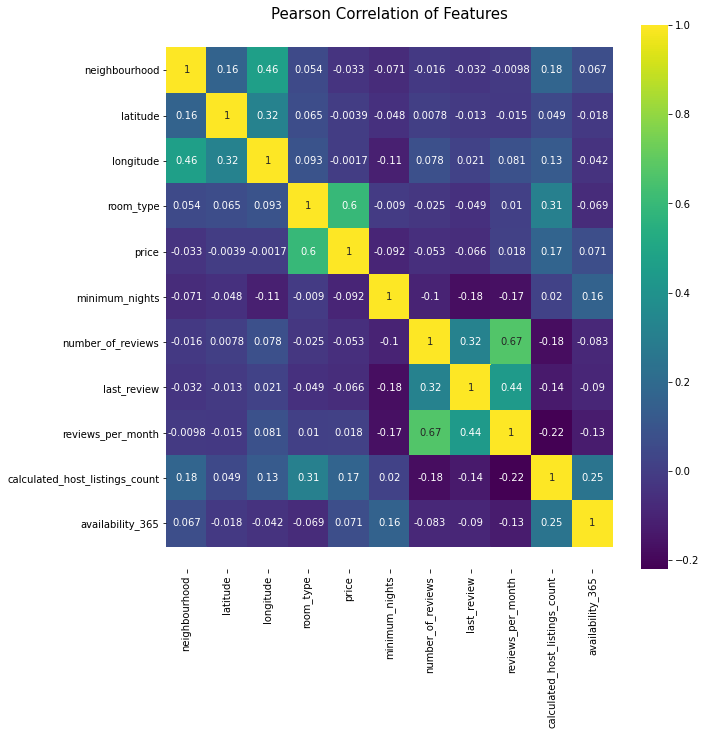

In [61]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_air.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [62]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6023 entries, 1 to 7906
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6023 non-null   int32  
 1   latitude                        6023 non-null   float64
 2   longitude                       6023 non-null   float64
 3   room_type                       6023 non-null   int32  
 4   price                           6023 non-null   int64  
 5   minimum_nights                  6023 non-null   int64  
 6   number_of_reviews               6023 non-null   int64  
 7   last_review                     6023 non-null   int32  
 8   reviews_per_month               6023 non-null   float64
 9   calculated_host_listings_count  6023 non-null   int64  
 10  availability_365                6023 non-null   int64  
dtypes: float64(3), int32(3), int64(5)
memory usage: 654.1 KB


In [63]:
df_air.describe()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000
mean,14.396148,1.303844,103.851192,2.523825,144.698987,15.705628,13.254026,0.662959,0.711398,48.123194,213.402955
std,4.299923,0.016346,0.025285,0.603093,86.659186,36.293444,29.294611,0.472738,1.151139,68.705788,143.659445
min,1.000000,1.245260,103.763270,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,1.291220,103.839400,2.000000,75.000000,2.000000,0.000000,0.000000,0.000000,3.000000,61.000000
50%,15.000000,1.306340,103.849560,3.000000,131.000000,3.000000,2.000000,1.000000,0.200000,14.000000,264.000000
75%,18.000000,1.314660,103.862700,3.000000,199.000000,10.000000,11.000000,1.000000,0.950000,67.000000,353.500000
max,19.000000,1.365830,103.918220,3.000000,400.000000,1000.000000,307.000000,1.000000,13.000000,274.000000,365.000000


### 2.4 Export the data

In [64]:
df_hr.to_csv('listings_new.csv', index=False)